# 📊 Stepwise Entropy Analysis

Analyze entropy and correctness of each step in Chain-of-Thought (CoT) traces.

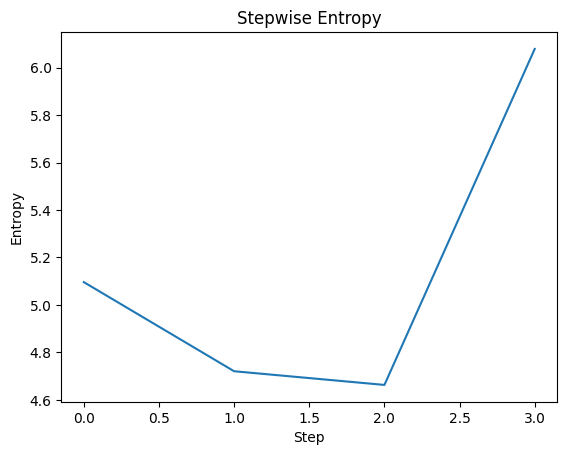

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np
import matplotlib.pyplot as plt

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

def compute_step_entropy(prompt, steps):
    entropies = []
    for step in steps:
        input_text = prompt + step
        inputs = tokenizer(input_text, return_tensors="pt")
        with torch.no_grad():
            logits = model(**inputs).logits
        probs = torch.nn.functional.softmax(logits[0, -1], dim=-1)
        entropy = -torch.sum(probs * torch.log(probs)).item()
        entropies.append(entropy)
        prompt += step
    return entropies

# Example usage
steps = [" Let's break this down.", " First, find the total.", " Then divide by two.", " Final answer: 4."]
entropies = compute_step_entropy("Q: John has 4 apples. ", steps)
plt.plot(entropies)
plt.title("Stepwise Entropy")
plt.xlabel("Step")
plt.ylabel("Entropy")
plt.show()